In [43]:
import os
import numpy as np 
import random
import pandas as pd
from itertools import combinations,combinations_with_replacement 
from PIL import Image

In [44]:
print(os.listdir("./"))
print(os.listdir("../"))
print(os.listdir("../Data/recognizing-faces-in-the-wild/"))

['.ipynb_checkpoints', 'EDA.ipynb', 'EDA_Image.ipynb', 'model.png', 'Siamese_Network.ipynb']
['Data', 'Modals', 'Notebooks']
['sample_submission.csv', 'test', 'test.zip', 'train', 'train.zip', 'train_relationships.csv']


In [45]:
DATA_BASE_PATH="../Data/recognizing-faces-in-the-wild/"
DATA_BASE_PATH

'../Data/recognizing-faces-in-the-wild/'

In [4]:
FAMILIES_PATH=os.path.join(DATA_BASE_PATH, 'train')
FAMILIES_PATH

'../Data/recognizing-faces-in-the-wild/train'

# Reading Training .csv File

In [13]:
train_excel_df = pd.read_csv(os.path.join(DATA_BASE_PATH, 'train_relationships.csv'), index_col=False)
train_excel_df['combination_pair_from_excel'] = train_excel_df['p1'] +'-'+ train_excel_df['p2']
train_excel_df['is_related']=1
train_excel_df

,p1,p2,combination_pair_from_excel,is_related
0,F0002/MID1,F0002/MID3,F0002/MID1-F0002/MID3,1
1,F0002/MID2,F0002/MID3,F0002/MID2-F0002/MID3,1
2,F0005/MID1,F0005/MID2,F0005/MID1-F0005/MID2,1
3,F0005/MID3,F0005/MID2,F0005/MID3-F0005/MID2,1
4,F0009/MID1,F0009/MID4,F0009/MID1-F0009/MID4,1
5,F0009/MID1,F0009/MID3,F0009/MID1-F0009/MID3,1
6,F0009/MID1,F0009/MID2,F0009/MID1-F0009/MID2,1
7,F0009/MID1,F0009/MID6,F0009/MID1-F0009/MID6,1
8,F0009/MID2,F0009/MID4,F0009/MID2-F0009/MID4,1
9,F0009/MID2,F0009/MID6,F0009/MID2-F0009/MID6,1


In [14]:
#np.asarray(Image.open(FAMILIES_PATH +'/'+ member_1 +'/'+ image_1)),
#np.asarray(Image.open(FAMILIES_PATH +'/'+ member_2 +'/'+ image_2))

False


# Geneate Familiy Member Combination Pair

In [93]:
def get_family_members_image_combination(member_1, member_2):
    member_1_path=os.path.join(FAMILIES_PATH, member_1)
    member_2_path=os.path.join(FAMILIES_PATH, member_2)
    
    return_result = [
            (
                member_1 +'-'+ member_2,
                FAMILIES_PATH +'/'+ member_1 +'/'+ image_1, 
                FAMILIES_PATH +'/'+ member_2 +'/'+ image_2
            )   
            for image_1 in os.listdir(member_1_path)
            for image_2 in os.listdir(member_2_path)
           ]
    
    if(len(return_result)<=0):
        return []
    else:
        return random.choices(return_result, k=min(len(return_result), 4))            

In [94]:
family_members_combination = [
    get_family_members_image_combination(family + '/' + pair[0], family + '/' + pair[1])
    for family in os.listdir(FAMILIES_PATH)
    for pair in combinations(os.listdir(os.path.join(FAMILIES_PATH, family)), 2)
]

family_members_combination = [val for sublist in family_members_combination for val in sublist]
#family_members_combination

In [95]:
family_members_combination_df = pd.DataFrame(family_members_combination, columns=['combination_pair_from_dir', 'left_image_path', 'right_image_path'])    
family_members_combination_df

,combination_pair_from_dir,left_image_path,right_image_path
0,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
1,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
2,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
3,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
4,F0002/MID1-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
5,F0002/MID1-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
6,F0002/MID1-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
7,F0002/MID1-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
8,F0002/MID2-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
9,F0002/MID2-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...


# Merging the Two Dataframes

In [11]:
train_df= pd.merge(left=family_members_combination_df, right=train_excel_df, how='left',  left_on='combination_pair_from_dir', right_on='combination_pair_from_excel')
train_df = train_df.drop(['p1','p2','combination_pair_from_excel'], axis=1)
train_df['is_related'] = (train_df['is_related'].fillna(0)).astype(int)
train_df

,combination_pair_from_dir,left_image_path,right_image_path,is_related
0,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
1,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
2,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
3,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
4,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
5,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
6,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
7,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
8,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
9,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0


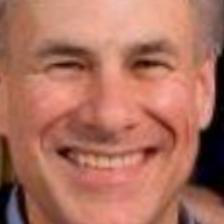

In [16]:
left_image_path=train_df['left_image_path'][0]
left_image=Image.open(left_image_path)
left_image    

In [17]:
left_image_data = np.asarray(left_image)
left_image_data.shape

(224, 224, 3)

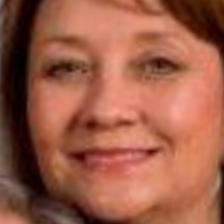

In [18]:
right_image_path=train_df['right_image_path'][0]
right_image=Image.open(right_image_path)
right_image    

In [19]:
right_image_data = np.asarray(right_image)
right_image_data.shape

(224, 224, 3)

In [20]:
left_image_data

array([[[137, 103,  94],
        [137, 103,  94],
        [136, 102,  93],
        ...,
        [115,  91,  87],
        [105,  84,  79],
        [ 95,  74,  69]],

       [[134, 100,  91],
        [133,  99,  90],
        [131,  97,  88],
        ...,
        [115,  91,  87],
        [105,  84,  79],
        [ 95,  74,  69]],

       [[129,  95,  86],
        [128,  94,  85],
        [127,  90,  82],
        ...,
        [114,  90,  86],
        [105,  84,  79],
        [ 95,  74,  69]],

       ...,

       [[  9,   8,   6],
        [  6,   5,   3],
        [  6,   4,   5],
        ...,
        [191, 129, 108],
        [192, 130, 109],
        [192, 130, 107]],

       [[ 12,   8,   5],
        [  8,   7,   5],
        [  6,   4,   5],
        ...,
        [193, 131, 110],
        [194, 132, 109],
        [194, 132, 109]],

       [[ 13,   9,   6],
        [  8,   7,   5],
        [  6,   4,   5],
        ...,
        [194, 132, 109],
        [195, 133, 110],
        [196, 134, 111]]

In [36]:
merged=np.vstack((left_image_data,right_image_data))

In [37]:
merged.shape

(448, 224, 3)

In [25]:
merged(0)

TypeError: 'numpy.ndarray' object is not callable

In [42]:
merged1=np.empty((3,2))
merged1

array([[0.0e+000, 4.9e-324],
       [9.9e-324, 1.5e-323],
       [2.0e-323, 2.5e-323]])

In [43]:
merged1.shape

(3, 2)

In [44]:
merged1[0]

array([0.e+000, 5.e-324])

In [46]:
merged1[0] =  [left_image_data, right_image_data]

ValueError: setting an array element with a sequence.

In [13]:
train_df.to_pickle("../Data/image_data.pkl")


In [14]:
import pickle
pickle_in = open("../Data/image_data.pkl","rb")
train_df_from_pickle = pickle.load(pickle_in)
pickle_in.close()

In [15]:
train_df_from_pickle

,combination_pair_from_dir,left_image_path,right_image_path,is_related
0,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
1,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
2,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
3,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
4,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
5,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
6,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
7,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
8,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
9,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0


In [54]:
train_df.shape[0]

433539

In [22]:
def batches_generator(batch_size, data_frame, shuffle=True):
    """Generates padded batches of tokens and tags."""
    
    n_samples = data_frame.shape[0]
    if shuffle:
        order = np.random.permutation(n_samples)
    else:
        order = np.arange(n_samples)

    n_batches = n_samples // batch_size
    
    for k in range(n_batches):
        batch_start = k * batch_size
        batch_end = min((k + 1) * batch_size, n_samples)
        current_batch_size = batch_end - batch_start
        
        left_image_list = []
        right_image_list = []
        is_related = []
        
        for idx in order[batch_start: batch_end]:
            x_list.append(idx)
            y_list.append(idx)
        yield left_image_list, right_image_list, is_related

In [25]:
batch = batches_generator(5, train_df, shuffle=False)

In [27]:
next(batch)

([5, 6, 7, 8, 9], [5, 6, 7, 8, 9])

In [36]:
final =list(batches_generator(10000, train_df, shuffle=False))
len(final)  


2

In [50]:
(final[40][1][9999])

409999

In [51]:
433539
400099

400099

In [32]:
min(1024,50)

50